In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.utils import shuffle



print(os.path.abspath(os.curdir))



C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927\Data


In [55]:
# os.chdir('./AMLS_19-20_SN16072927')
# os.chdir('./A1')
os.chdir('./Data')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927\Data


In [56]:
from data_preprocessing import get_data_A1

tr_X_A1, te_X_A1, tr_Y_A1, te_Y_A1 = get_data_A1()

In [57]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from IPython.display import display

def SVM_A1(training_images, training_labels, test_images, test_labels):
    
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]}, 
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]},
                        {'kernel': ['linear'], 'C': [1, 10, 100]}
                        ]
    
    classifierA1 = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs=-1)       #gridsearchCV use 5 k-fold by default
    classifierA1.fit(training_images, training_labels)
    classifierA1_best = classifierA1.best_estimator_

# default score of SVM is accuracy
    print("Best SVM parameter:", classifierA1.best_params_)
    print("Best SVM score:", classifierA1.best_score_)

# print dataframe  
    results = pd.concat([pd.DataFrame(classifierA1.cv_results_["params"]), pd.DataFrame(classifierA1.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
       
# make prediction using the best classifier
    predA1 = classifierA1.best_estimator_.predict(test_images)
    
    return predA1, results, classifierA1_best




In [58]:
import time

starttime = time.time()
predA1, results, classifierA1_best = SVM_A1(tr_X_A1, tr_Y_A1, te_X_A1, te_Y_A1)
stoptime = time.time()
print(stoptime - starttime)

Best SVM parameter: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM score: 0.9187999716974456
206.87978219985962


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(te_Y_A1, predA1))
print("Precision:", precision_score(te_Y_A1, predA1))
print("Recall:", recall_score(te_Y_A1, predA1))
print("F1:", f1_score(te_Y_A1, predA1))



Accuracy: 0.922970159611381
Precision: 0.9209809264305178
Recall: 0.9272976680384087
F1: 0.9241285030758715


[0.9905597  0.97742268 0.97168471 0.96785886 0.96588695]
[0.87341753 0.89973254 0.91046062 0.91592868 0.91928678]


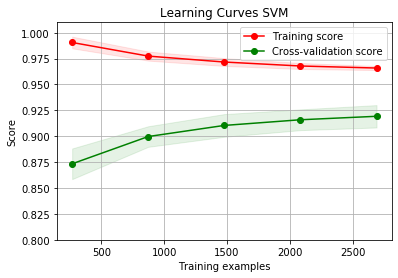

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    return plt

title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = classifierA1_best
X, y = tr_X_A1, tr_Y_A1 
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=-1)

plt.show()

# default test score for SVM is accuracy

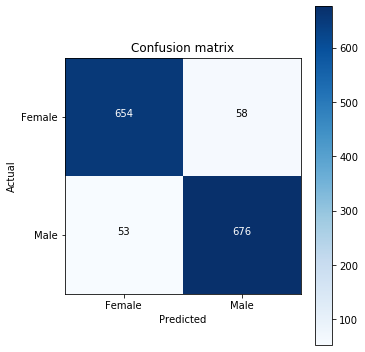

In [63]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
dict_characters = {0 : 'Female', 1: 'Male'}


confusion_mat = confusion_matrix(te_Y_A1, predA1)
plot_confusion_matrix(confusion_mat, classes = list(dict_characters.values()))

In [65]:
print(len(tr_X_A1) + len(te_X_A1))

4803
